# Intro
---

- LazyPredict는 몇초만에 여러개의 모델을 동시에 테스트하여 성능 측정해주는 모듈이다.
- sklearn을 활용하여 작동되는 모듈이다. 
- 전처리된 데이터와 2~3줄의 코드만 있으면 바로 사용 가능하다는 점이 매우 유용하다.

In [1]:
#!pip install lazypredict --user

In [2]:
# 기초 전처리
import pandas as pd

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

# pandas 결과값의 표현 범위 소수점 2자리수로 변경
pd.options.display.float_format = '{:.2f}'.format

# 파일 로드위한 directory 확인 및 현재 경로로 설정
import os
a = os.getcwd()
os.chdir(a)

# 분류 모델

## 데이터 로드

In [3]:
# kaggle의 심부전증 데이터 활용
df = pd.read_csv("./data/heart_failure.csv")
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.19,0.00,-1.53,0.02,0.49,-1.50,0,0,1,1,0,1
1,-0.49,7.51,-0.01,0.00,-0.28,-0.14,0,0,0,1,0,1
2,0.35,-0.45,-1.53,-1.04,-0.09,-1.73,0,0,0,1,1,1
3,-0.91,-0.49,-1.53,-0.55,0.49,0.09,1,0,0,1,0,1
4,0.35,-0.44,-1.53,0.65,1.26,-4.68,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.10,-0.54,-0.01,-1.11,-0.28,1.45,0,1,1,1,1,0
295,-0.49,1.28,-0.01,0.07,-0.19,0.54,0,0,0,0,0,0
296,-1.33,1.53,1.85,4.90,-0.58,0.31,0,1,0,0,0,0
297,-1.33,1.89,-0.01,-1.26,0.01,0.77,0,0,0,1,1,0


데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Train / Test split

In [4]:
y = df['DEATH_EVENT']
X = df.iloc[:,:-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## lazypredict로 분류모델 성능 예측

In [6]:
# Importing the packages that we will use
import lazypredict
from lazypredict.Supervised import LazyClassifier


# Running all the models
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models.reset_index(inplace=True)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 30.58it/s]


,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,Perceptron,0.71,0.69,0.69,0.71,0.01
1,BaggingClassifier,0.71,0.68,0.68,0.70,0.04
2,NearestCentroid,0.69,0.68,0.68,0.69,0.01
3,BernoulliNB,0.69,0.66,0.66,0.68,0.01
4,SVC,0.69,0.66,0.66,0.68,0.01
5,LGBMClassifier,0.68,0.66,0.66,0.67,0.04
6,ExtraTreesClassifier,0.69,0.65,0.65,0.67,0.14
7,XGBClassifier,0.67,0.64,0.64,0.66,0.09
8,NuSVC,0.67,0.63,0.63,0.65,0.01
9,DecisionTreeClassifier,0.64,0.63,0.63,0.64,0.01


## LazyPredict 결과 검증

- LazyPredict는 scikit-learn을 사용하기 때문에 sklearn에서 사용하는 기존 방식대로 검증이 가능하다.
- Random Forest 모델의 성능을 sklearn 을 통해 확인해보면 아래와 같다.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [8]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score

print('Evaluation metrics - Random Forest:')
print('Accuracy: '+ str(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: '+ str(metrics.f1_score(y_test, y_pred, average='macro')))

Evaluation metrics - Random Forest:
Accuracy: 0.6933333333333334
F1 Score: 0.6644621668936005


In [9]:
models[models['Model'] == 'RandomForestClassifier']

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
10,RandomForestClassifier,0.65,0.62,0.62,0.64,0.17


In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [11]:
print('Evaluation metrics - Random Forest:')
print('Accuracy: '+ str(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: '+ str(metrics.f1_score(y_test, y_pred, average='macro')))

Evaluation metrics - Random Forest:
Accuracy: 0.6533333333333333
F1 Score: 0.592391304347826


In [12]:
models[models['Model']=='LogisticRegression']

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
12,LogisticRegression,0.67,0.62,0.62,0.64,0.01


- 완벽하게 일치하지는 않지만 결과가 상당히 유사한 것을 알 수 있다.

# 예측 모델

In [13]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix


# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## 데이터 로드

In [14]:
df = pd.read_csv('./data/Youtube_data.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,r_avg,g_avg,b_avg,publish_time2,publish_date,elapsed_day,total_number_of_sign,number_of_tag,positive_ratio,sign_per_day,positive_ratio_per_day,comment_per_day,total_sign_comment_ratio,description_length,title_length,channel_title_mean_enc,category_id_mean_enc
0,RxGQe4EeEpA,2017-11-14,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,56,41,31,2017-11-13,2017-11-13,2,1462,6,35.55,731.00,17.77,136.00,5.38,152,18,125208.00,148184.15
1,9V8bnWUmE9U,2017-11-14,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요,105,84,86,2017-11-11,2017-11-11,4,5278,6,30.80,1319.50,7.70,114.75,11.50,15,26,421409.00,148184.15
2,0_8py-t5R80,2017-11-14,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정,89,86,86,2017-11-12,2017-11-12,3,2266,9,12.10,755.33,4.03,406.33,1.86,19,26,258691.29,132860.43
3,bk55RbxiQdI,2017-11-14,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,81,77,61,2017-11-13,2017-11-13,2,1203,7,10.04,601.50,5.02,225.00,2.67,389,23,184936.65,132860.43
4,AmP0ryzDmbY,2017-11-14,김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 깜놀,하우스,25,2017-11-12T10:17:48.000Z,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",188707,545,311,357,https://i.ytimg.com/vi/AmP0ryzDmbY/default.jpg,False,False,False,김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...,117,103,100,2017-11-12,2017-11-12,3,856,6,1.75,285.33,0.58,119.00,2.40,289,48,178386.07,132860.43


## Train / Test split

In [15]:
features = ['likes', 'dislikes', 'comment_count', 'elapsed_day', 'number_of_tag',
            'positive_ratio', 'description_length', 'title_length',
            'r_avg', 'g_avg', 'b_avg',  
            'channel_title_mean_enc', 'category_id_mean_enc']            

X = df[features]

# target value설정
y = df['views']

# train & test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# train_set에 대해서 MinMax 스케일링

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<IPython.core.display.Javascript object>

## LazyPredict로 예측모델 성능 예측

In [17]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_scaled, x_test_scaled, y_train, y_test)
models.reset_index(inplace=True)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:24<00:00,  1.72it/s]


,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,GradientBoostingRegressor,0.92,0.92,537708.62,1.23
1,BaggingRegressor,0.90,0.90,593782.82,0.44
2,ExtraTreesRegressor,0.89,0.89,616691.45,2.09
3,XGBRegressor,0.87,0.87,682090.03,0.28
4,DecisionTreeRegressor,0.86,0.86,692122.77,0.08
5,RandomForestRegressor,0.86,0.86,698702.22,4.32
6,HistGradientBoostingRegressor,0.72,0.72,992189.57,0.83
7,KNeighborsRegressor,0.69,0.69,1039114.47,0.25
8,ExtraTreeRegressor,0.67,0.67,1071859.85,0.03
9,OrthogonalMatchingPursuit,0.66,0.67,1082859.83,0.01


## LazyPredict 결과 검증

In [18]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting

# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [19]:
# Evaluation Functions
def rmse(model, y_test, y_pred, x_train_scaled, y_train):
 r_squared = model.score(x_test_scaled, y_test)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 print('R-squared: ' + str(r_squared))
 print('Root Mean Squared Error: '+ str(rmse))

# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for '+ model_name))
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [20]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(x_train_scaled, y_train)
y_pred = hist.predict(x_test_scaled)

In [21]:
rmse(hist, y_test, y_pred, x_train_scaled, y_train)

<IPython.core.display.Javascript object>

R-squared: 0.7199512045441692
Root Mean Squared Error: 992189.5711609953


In [24]:
models[models['Model'] == 'HistGradientBoostingRegressor']

,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
6,HistGradientBoostingRegressor,0.72,0.72,992189.57,0.83


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

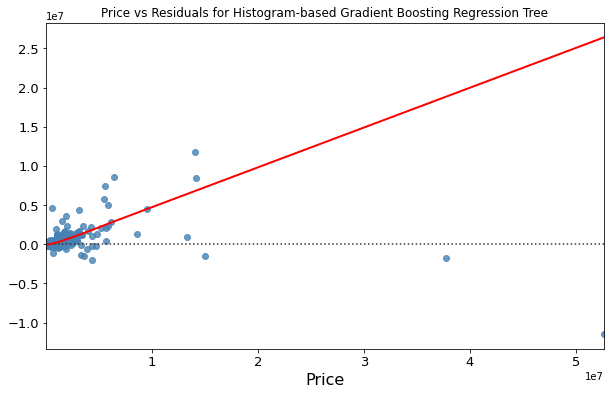

In [23]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

# Conclusion

- 위와 같이 LazyPredict는 분석하고자 하는 데이터가 사용가능한 모든 모델에 적용될때의 **대략적인 결과** 를 알 수 있다.<br><br>
- 따라서 최초에 모델링 구성을 한뒤 앙상블 모델링을 할때 활용하면 매우 유용할 것으로 생각된다.<br><br>
- 하지만, 결국엔 파라미터 튜닝등으로 모델의 성능을 향상하는 것은 분석가의 몫이기 때문에 단순참고용으로 활용하는 것이 좋을 것 같다.

# Reference

[How to Run 40 Regression Models with a Few Lines of Code](https://towardsdatascience.com/how-to-run-40-regression-models-with-a-few-lines-of-code-5a24186de7d)